In [1]:
# Installation of all the required libraries
#!pip install accelerate -U  
# Utility to optimize PyTorch models for various hardware
#!pip install transformers[torch]  
# Hugging Face's transformers library with PyTorch support
#!pip install torch          
# PyTorch library
#!pip install openpyxl       
# Library to read/write Excel files
#!pip install scikit-learn

In [2]:
# Import the necessary libraries
import sklearn
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean
from sklearn.feature_extraction.text import TfidfVectorizer
#performance and evaluation of test data using metrics - accuracy score, confusion matrix, and classification report.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,roc_curve,auc
#Classiifers - Logistic Regression, SVC, Random Forest, and Multinomial Naive Bayes, are trained on the training data.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold, cross_val_score

In [3]:
#Random Forest Model
# Function to build and evaluate a Random Forest model
def build_model_RF(X_train, y_train, X_test, y_test, name_of_test):
    # Initialization and training a Random Forest model with specified parameters
    start_time = time.time()
    rfc = RandomForestClassifier()
    #parameters
    max_depth = [3, 5, 10, None]
    min_samples_leaf = [1, 5, 10]
    min_samples_split = [2, 10, 20]
    max_features = ['log2','sqrt']

    # Grid search parameters
    grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    # Best Model
    best_model = RandomForestClassifier(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Total time taken to train the model {end_time-start_time} seconds")
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)
    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print(
        "Test accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test)
    )

    # Printing the classification report
    print(classification_report(y_test, y_pred))
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))
    # Printing precision, recall, fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Saving the best model
    with open('tfidf_rf_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    
    return best_model

In [6]:
# Support Vector Machine model
# Function to build and evaluate a Support Vector Machine model
def build_model_SVC(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Initialization and training a Support Vector Machine model with specified parameters
    svc = SVC(probability=True)
    #define parameters
    C = [0.1, 1, 10]
    gamma_val = ['scale', 'auto']
    kernel_val = ["rbf", "linear", "sigmoid"]

    # Grid search parameters
    grid = dict(C=C, gamma=gamma_val, kernel=kernel_val)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    # best model
    best_model = SVC(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    print(f"Total time taken to train the model {end_time-start_time} seconds")
    
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)


    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    # Printing the classification report
    print(classification_report(y_test, y_pred))
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))
    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Saving the best model
    with open('tfidf_svc_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    
    return best_model

In [8]:
# Logistic Regression Model
# Function to build and evaluate a Logistic Regression model
def build_model_LR(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()

    log_reg = LogisticRegression()
    

    #define parameters
    solvers = ['newton-cg','lbfgs','saga'] #Suitable for large datasets
    penalty = ['l2','l1']
    c_values = [100, 10, 1.0, 0.1]
    max_iter = [100, 200, 300]

    #grid_search
    grid = dict(solver = solvers, penalty = penalty, C=c_values, max_iter=max_iter)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    #best model
    best_model = LogisticRegression(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Total time taken to train the model {end_time-start_time} seconds")
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)
    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    # Printing the classification report
    print(classification_report(y_test, y_pred))  # Evaluating prediction ability
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))

    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Save best model
    with open('tfidf_lr_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    
    return best_model

In [27]:
# Building KNN model to find the best model and testing
def build_model_KNN(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Creation of an instance for KNeighborsClassifier model
    knn = KNeighborsClassifier()

    # Define parameters for grid search
    n_neighbors = [3, 5, 7, 9, 11]
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']

    # grid_search
    grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    best_model = KNeighborsClassifier(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Total time taken to train the model {start_time-end_time} seconds")
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    print("Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train))
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    #Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)

    #Save the best knn model
    with open('tfidf_knn_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    return best_model

In [29]:
# MLP (Multilayer Perceptron) model
def build_model_MLP(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Creation of an instance for MLPClassifier model
    mlp = MLPClassifier(max_iter=1000)

    # Define parameters for grid search
    hidden_layer_sizes = [(50,), (100,), (50,50), (100,50), (100,100)]
    activation = ['tanh', 'relu']
    solver = ['adam', 'sgd']
    alpha = [0.0001, 0.05]
    learning_rate = ['constant','adaptive']

    # grid_search
    grid = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate=learning_rate)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=mlp, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    best_model = MLPClassifier(**grid_result.best_params_, max_iter=1000)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Total time taken to train the model {start_time-end_time} seconds")
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    print("Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train))
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    #Saving the best mlp model
    with open('tfidf_mlp_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    return best_model

In [10]:
# TF-IDF Feature Extraction Function
def transform_tfidf(training, testing, column_name):
    training[column_name] = training[column_name].fillna('')
    testing[column_name] = testing[column_name].fillna('')
    Tfidf = TfidfVectorizer(
        ngram_range=(1, 3), max_features=100, stop_words='english'   
    )
    Tfidf_fit = Tfidf.fit(training[column_name])
    Tfidf_training = Tfidf_fit.transform(training[column_name])  
    Tfidf_training_df = pd.DataFrame(
        Tfidf_training.toarray(), columns=Tfidf.get_feature_names_out()
    )
    Tfidf_testing = Tfidf_fit.transform(testing[column_name]) 
    Tfidf_testing_df = pd.DataFrame(
        Tfidf_testing.toarray(), columns=Tfidf.get_feature_names_out()
    )
    return Tfidf_fit, Tfidf_training_df, Tfidf_testing_df

In [12]:
# Load training and test sets
# Loading the train data
df_train = pd.read_csv("Dataset1_2Train_new3.csv")
print("...successfully loaded training data")
print("Total length of training data: ", len(df_train))

# Loading the test data
df_test = pd.read_csv("Dataset1_2Test_new3.csv")
print("...successfully loaded testing data")
print("Total length of testing data: ", len(df_test))

# Creation TfIdf features for the training set
tfidf_vect_fit, df_train_tfidf, df_test_tfidf = transform_tfidf(
    df_train, df_test, "final_cleaned_text"
)
print("...successfully created the unstemmed TFIDF data")

# Loading the vectorizer fit on training data into file
with open('tfidf_vect_fit2.pkl', 'wb') as file:
    pickle.dump(tfidf_vect_fit, file)



...successfully loaded training data
Total length of training data:  120000
...successfully loaded testing data
Total length of testing data:  29500
...successfully created the unstemmed TFIDF data


In [9]:
#Building LR model to find the best model and testing
tfidf_lr_best_model = build_model_LR(
    df_train_tfidf,
    df_train["label"],
    df_test_tfidf,
    df_test["label"],
    "TFIDF LR",
)

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages

0.976417 (0.001550) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.975950 (0.001458) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.976525 (0.001568) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.976508 (0.001559) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.976417 (0.001550) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
0.975950 (0.001458) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
0.976517 (0.001564) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
tfidf_knn_best_model = build_model_KNN(
    df_train_tfidf,
    df_train["label"],
    df_test_tfidf,
    df_test["label"],
    "TFIDF KNN",
)

0.916200 (0.002757) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.920833 (0.003137) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.923742 (0.003083) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.929392 (0.003097) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.925875 (0.002032) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.932500 (0.001920) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.929583 (0.003793) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.937367 (0.003473) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.929192 (0.003990) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.937817 (0.003657) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
0.914300 (0.002899) with: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.9

In [32]:
tfidf_mlp_best_model = build_model_MLP(
    df_train_tfidf,
    df_train["label"],
    df_test_tfidf,
    df_test["label"],
    "TFIDF MLP",
)

0.982625 (0.001246) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
0.974150 (0.001509) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.983242 (0.001372) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.974333 (0.001669) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.982217 (0.002176) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.974125 (0.001552) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.982192 (0.002687) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.9742

In [33]:
tfidf_svc_best_model = build_model_SVC(
    df_train_tfidf,
    df_train["label"],
    df_test_tfidf,
    df_test["label"],
    "TFIDF SVC",
)


0.977533 (0.000900) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.974108 (0.000947) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.956583 (0.003684) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.963175 (0.001452) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.974108 (0.000947) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.960258 (0.001562) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.982083 (0.000914) with: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.975525 (0.000990) with: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.951292 (0.004577) with: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.972258 (0.001097) with: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.975525 (0.000990) with: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.970050 (0.001116) with: {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.983892 (0.000707) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.975858 (0.000913) with: {'C': 10, 'gamma': 'scale', '

In [34]:
#Building RF model to find the best model and testing
tfidf_rf_best_model = build_model_RF(
    df_train_tfidf,
    df_train["label"],
    df_test_tfidf,
    df_test["label"],
    "TFIDF RF",
)

0.882017 (0.013246) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.888367 (0.006894) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.883942 (0.007895) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20}
0.887375 (0.005049) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
0.887100 (0.008081) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10}
0.886617 (0.008423) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20}
0.893217 (0.010402) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
0.888250 (0.009960) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10}
0.884317 (0.006349) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_l

In [35]:
# Loading Dataset 2 for testing
df_test1 = pd.read_csv("Dataset2_2Train_new2.csv", encoding='latin1')
df_test2 = pd.read_csv("Dataset2_2Test_new2.csv", encoding='latin1')
df_test = pd.concat([df_test1, df_test2], axis=0, ignore_index=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)
# final_cleaned_text contains the text after level 1 and 2 preprocessing
X_test1 = df_test['final_cleaned_text'].values
y_test = df_test['label'].values

In [36]:
# Testing the best LR model with Dataset 2
def check_best_model_LR(X_test1, y_test, tfidf_lr_best_model, tfidf_vect_fit):
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = tfidf_vect_fit.transform(X_test1)
    y_pred = tfidf_lr_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    result_df = pd.DataFrame({
        'X_test': X_test1,
        'y_test': y_test,
        'y_pred': y_pred
    })
    actual_spam = result_df[(result_df['y_test'] == 1) & (result_df['y_pred'] == 1)]
    misclassified_spam = result_df[(result_df['y_test'] == 1) & (result_df['y_pred'] == 0)]
    return misclassified_spam, actual_spam
start_time = time.time()
misclassified_spam, actual_spam = check_best_model_LR(X_test1, y_test, tfidf_lr_best_model, tfidf_vect_fit)
end_time = time.time()
print(f"Total time taken to test the model {end_time-start_time} seconds")

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     22458
           1       0.90      0.72      0.80      4491

    accuracy                           0.94     26949
   macro avg       0.93      0.85      0.88     26949
weighted avg       0.94      0.94      0.94     26949

[[22118   340]
 [ 1271  3220]]
Precision: 0.9044943820224719
Recall: 0.7169895346248052
FScore: 0.7999006334616817
Testing Accuracy: 0.9402204163419793
Total time taken to test the model 6.113078832626343 seconds


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
# Testing the best RF model with Dataset 2
def check_best_model_RF(X_test1, y_test, tfidf_rf_best_model, tfidf_vect_fit):
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = tfidf_vect_fit.transform(X_test1)
    y_pred = tfidf_rf_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
start_time = time.time()
check_best_model_RF(X_test1, y_test, tfidf_rf_best_model, tfidf_vect_fit)
end_time = time.time()
print(f"Total time taken to test the model {end_time-start_time} seconds")

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22458
           1       0.93      0.74      0.83      4491

    accuracy                           0.95     26949
   macro avg       0.94      0.87      0.90     26949
weighted avg       0.95      0.95      0.95     26949

[[22225   233]
 [ 1163  3328]]
Precision: 0.9345689413086212
Recall: 0.74103763081719
FScore: 0.8266269249875807
Testing Accuracy: 0.948198448922038
Total time taken to test the model 6.305509090423584 seconds


In [38]:
# Testing the best KNN model with Dataset 2
def check_best_model_KNN(X_test1, y_test, tfidf_knn_best_model, tfidf_vect_fit):
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = tfidf_vect_fit.transform(X_test1)
    y_pred = tfidf_knn_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
start_time = time.time()
check_best_model_KNN(X_test1, y_test, tfidf_knn_best_model, tfidf_vect_fit)
end_time = time.time()
print(f"Total time taken to test the model {end_time-start_time} seconds")

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.92      0.94     22458
           1       0.65      0.79      0.72      4491

    accuracy                           0.90     26949
   macro avg       0.81      0.85      0.83     26949
weighted avg       0.91      0.90      0.90     26949

[[20580  1878]
 [  943  3548]]
Precision: 0.6538886841135274
Recall: 0.7900244934313071
FScore: 0.7155389734798829
Testing Accuracy: 0.8953207911239749
Total time taken to test the model 10.359087705612183 seconds


In [39]:
# Testing the best MLP model with Dataset 2
def check_best_model_MLP(X_test1, y_test, tfidf_mlp_best_model, tfidf_vect_fit):
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = tfidf_vect_fit.transform(X_test1)
    y_pred = tfidf_mlp_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
start_time = time.time()
check_best_model_MLP(X_test1, y_test, tfidf_mlp_best_model, tfidf_vect_fit)
end_time = time.time()
print(f"Total time taken to test the model {end_time-start_time} seconds")

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22458
           1       0.89      0.75      0.82      4491

    accuracy                           0.94     26949
   macro avg       0.92      0.87      0.89     26949
weighted avg       0.94      0.94      0.94     26949

[[22050   408]
 [ 1111  3380]]
Precision: 0.8922914466737064
Recall: 0.7526163437987086
FScore: 0.8165237347505737
Testing Accuracy: 0.9436342721436788
Total time taken to test the model 6.116954326629639 seconds


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [41]:
# Testing the best SVC model with Dataset 2
def check_best_model_SVC(X_test1, y_test, tfidf_svc_best_model,tfidf_vect_fit):
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = tfidf_vect_fit.transform(X_test1).toarray()
    y_pred = tfidf_svc_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
start_time = time.time()
check_best_model_SVC(X_test1, y_test, tfidf_svc_best_model, tfidf_vect_fit)
end_time= time.time()
print(f"Total time taken to test the model {end_time-start_time} seconds")

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22458
           1       0.89      0.75      0.81      4491

    accuracy                           0.94     26949
   macro avg       0.92      0.86      0.89     26949
weighted avg       0.94      0.94      0.94     26949

[[22033   425]
 [ 1132  3359]]
Precision: 0.8876849894291755
Recall: 0.7479403250946337
FScore: 0.8118429003021148
Testing Accuracy: 0.9422242012690638
Total time taken to test the model 17.614754915237427 seconds


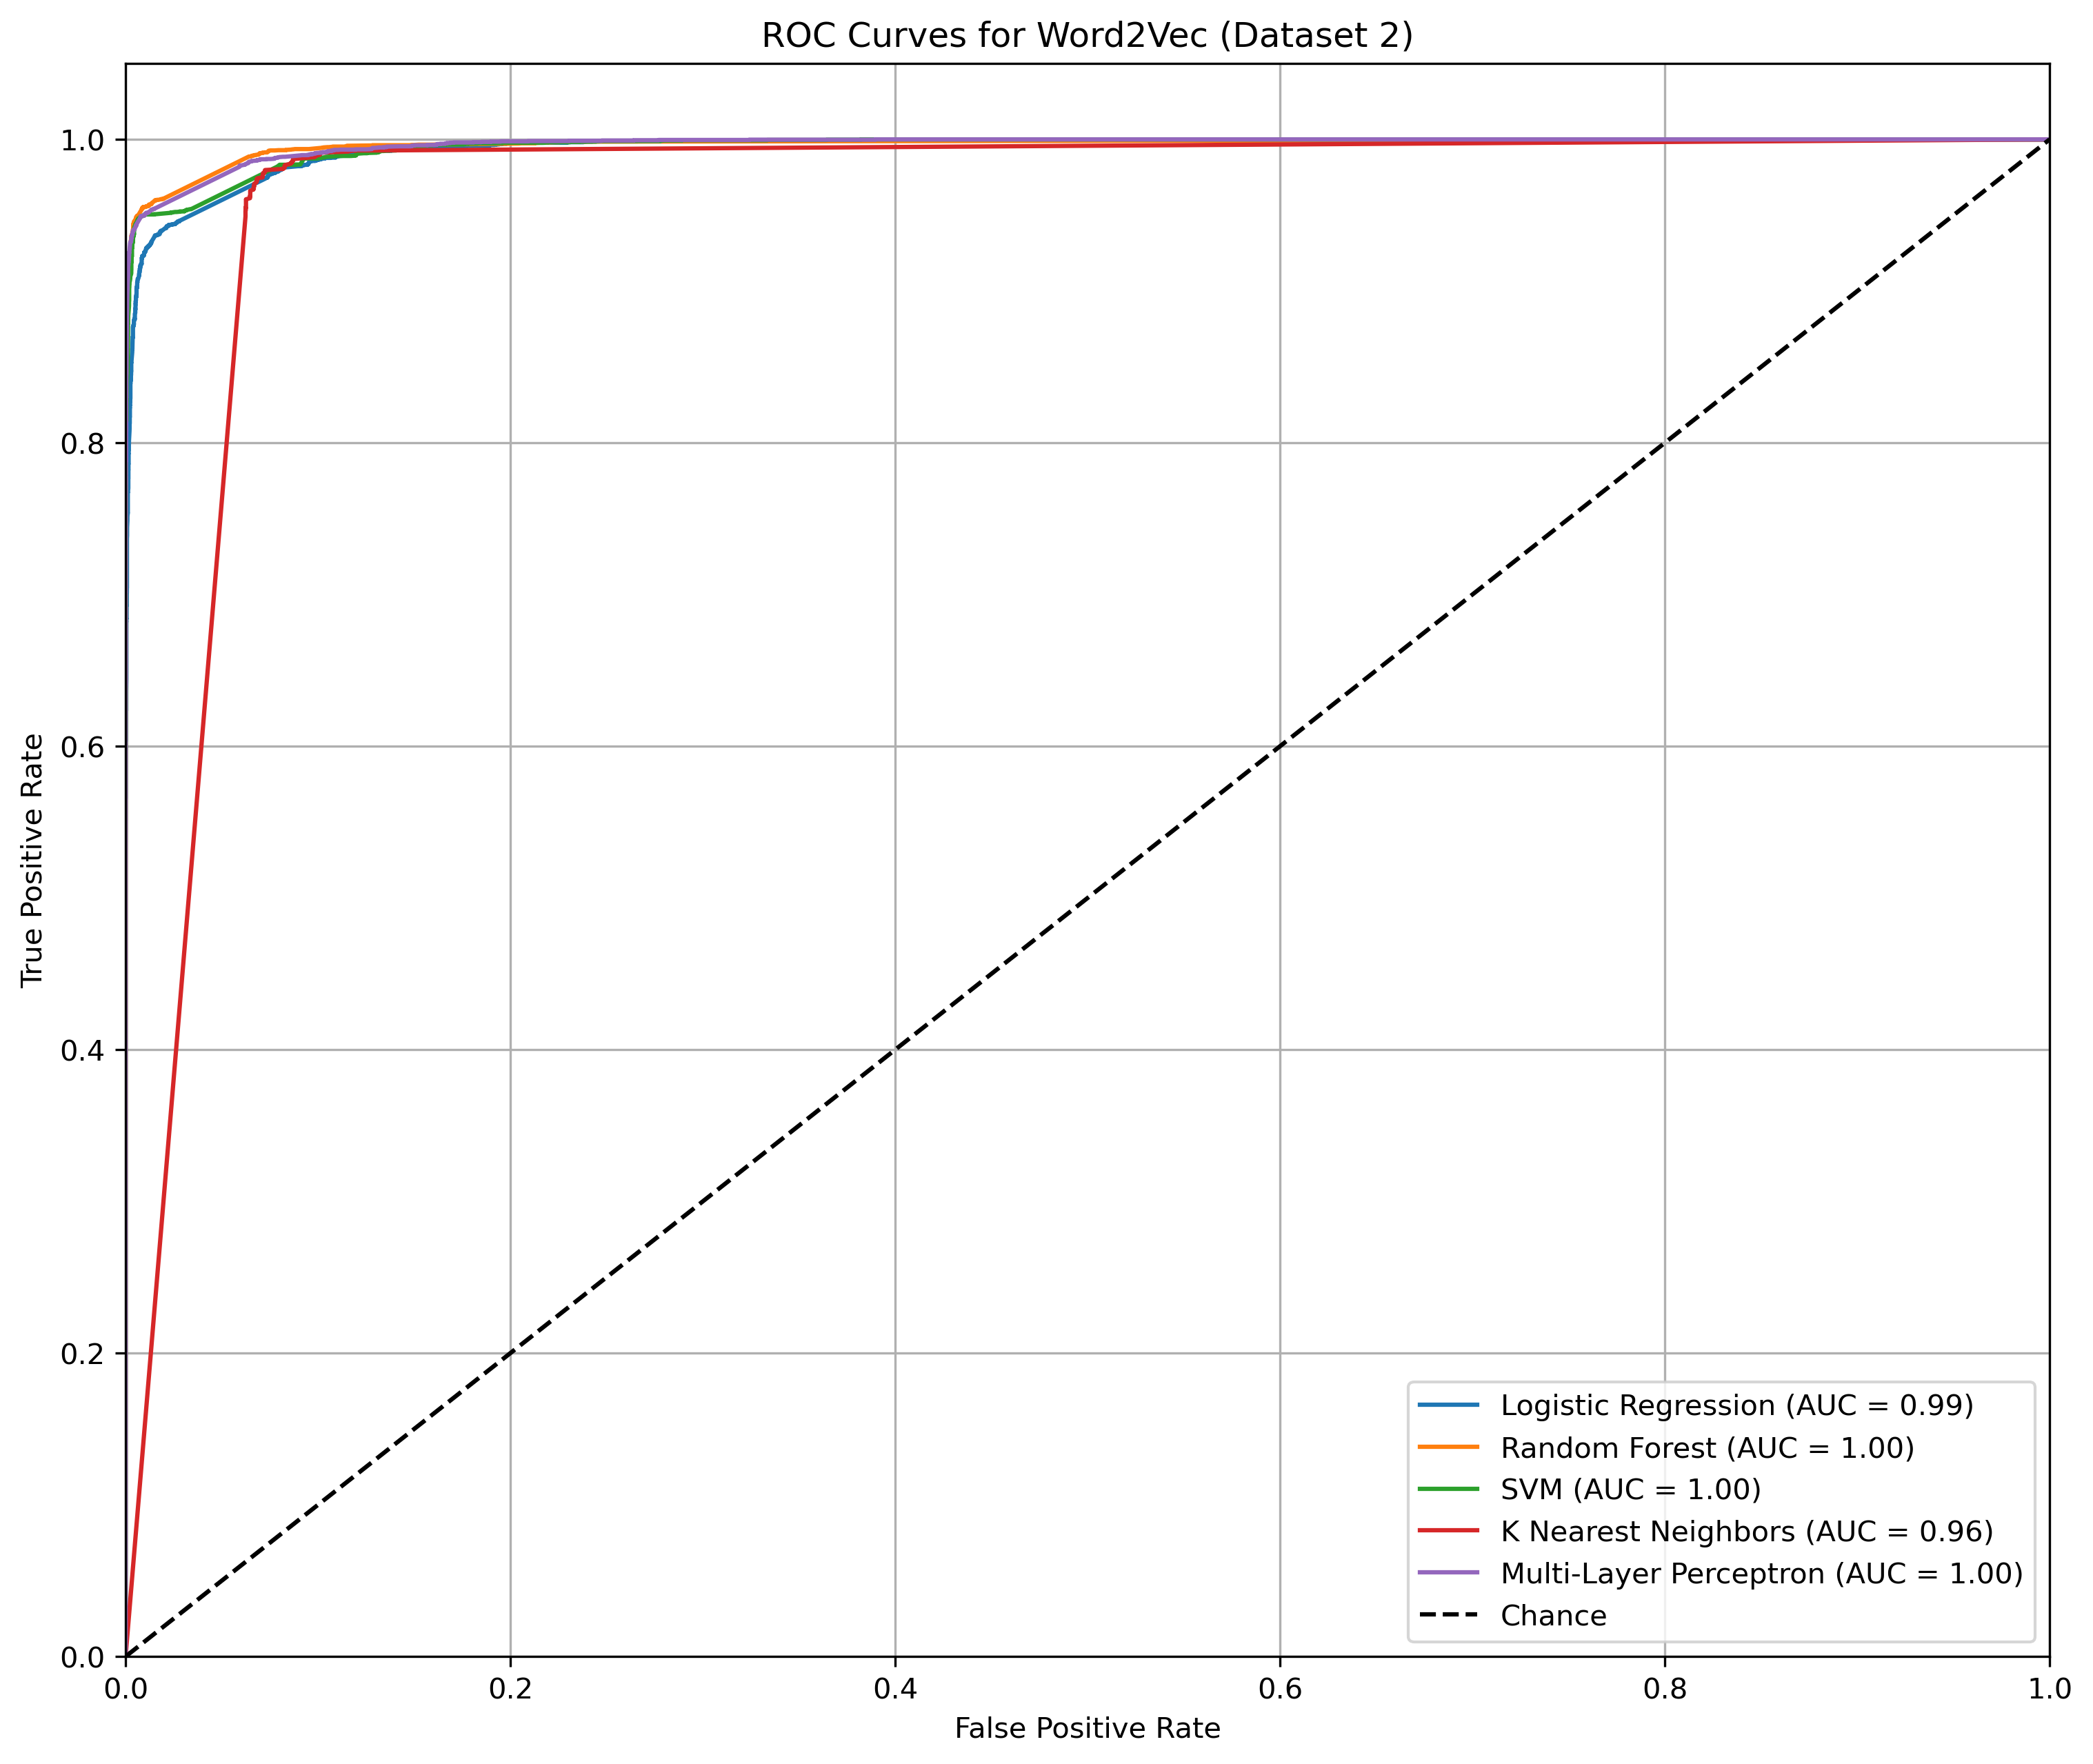

In [14]:
 # Higher DPI ROC Plots for better resolution
model_files = [
    ('tfidf_lr_model2.pkl', 'Logistic Regression'),
    ('tfidf_rf_model2.pkl', 'Random Forest'),
    ('tfidf_svc_model2.pkl', 'SVM'),
    ('tfidf_knn_model2.pkl', 'K Nearest Neighbors'),
    ('tfidf_mlp_model2.pkl', 'Multi-Layer Perceptron')
]
df_test_tfidf.columns = df_test_tfidf.columns.astype(str)
plt.figure(figsize=(12, 10), dpi=300) 

for file, label in model_files:
    with open(file, 'rb') as f:
        model = pickle.load(f)
    try:
        y_proba = model.predict_proba(df_test_tfidf)[:, 1]
    except AttributeError:
        y_proba = model.decision_function(df_test_tfidf)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Word2Vec (Dataset 2)')
plt.legend(loc="lower right")
plt.grid(True)

# Save high-resolution version
plt.savefig("roc_curves_tfidf_dataset2.png", dpi=300, bbox_inches='tight')
plt.show()